In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!python --version

Python 3.11.11


## READ IMAGE

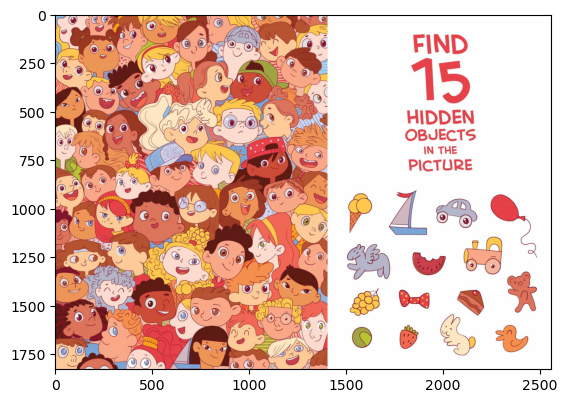

In [3]:
# load the target image
image = cv2.imread('Midterm-ImageSet/Finding/1.jpg')
# convert brg to rgb because opencv loads imgs in brg
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# display the image using matplotlib
plt.imshow(image_rgb)


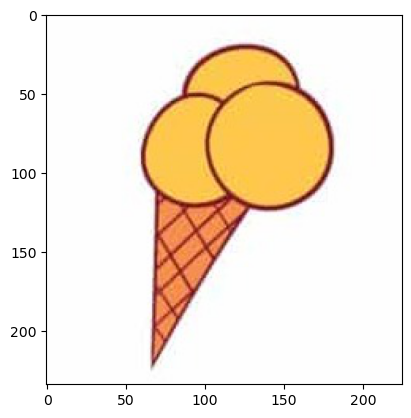

In [4]:
# list the template images
templates1 = ["ball","baloon","bear","bow","boat","bunny","cake","car","duck",
              "grape","horse","icecream","strawberry""watermelon","wood"]
# the path of templates
template_path = f"Templates1/{templates1[11]}.jpg"
# load the templates image
template = cv2.imread(template_path)
# convert brg to rgb because opencv loads imgs in brg
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
# display the image using matplotlib
plt.imshow(template_rgb)

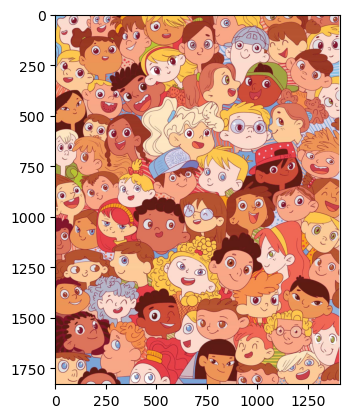

In [5]:
# load the cropped image
cropped = cv2.imread('CropImg/cropped_1.jpg')
# convert brg to rgb because opencv loads imgs in brg
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
# display the image using matplotlib
plt.imshow(cropped_rgb)


In [6]:
# test with scale factor = 0.7
scale_factor = 0.7
image_gray = cv2.cvtColor(cropped_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(template_path)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

new_width = int(template_rgb.shape[1] * scale_factor)
new_height = int(template_rgb.shape[0] * scale_factor)
template_rgb_resize = cv2.resize(template_rgb, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Convert the template to grayscale
template_gray = cv2.cvtColor(template_rgb_resize, cv2.COLOR_RGB2GRAY)

_, mask = cv2.threshold(template_gray, 240, 255, cv2.THRESH_BINARY_INV)

template_h, template_w = template_gray.shape[:2]

result = cv2.matchTemplate(image_gray, template_gray, cv2.TM_SQDIFF_NORMED, mask=mask)

### GRAY SCALE

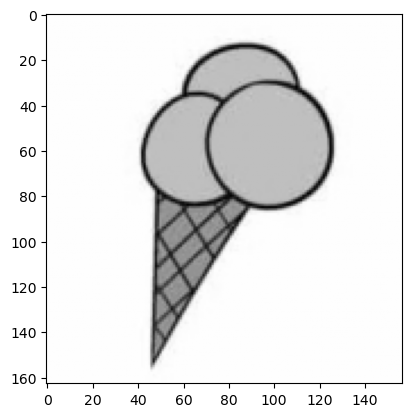

In [11]:
plt.imshow(template_gray, cmap='gray')

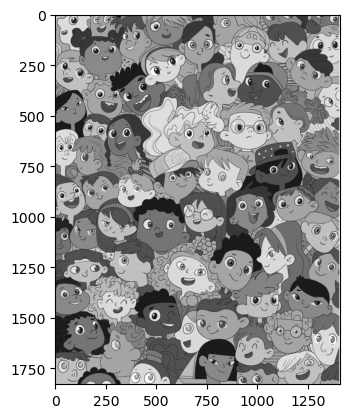

In [12]:
plt.imshow(image_gray, cmap='gray')

### RESULT OF TEMPLATE MATCHING

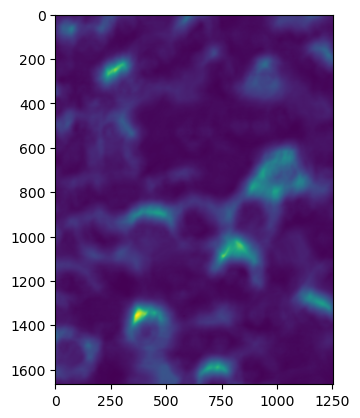

In [8]:
plt.imshow(result)

min_val: 0.06653976440429688, max_val: 2.560850143432617


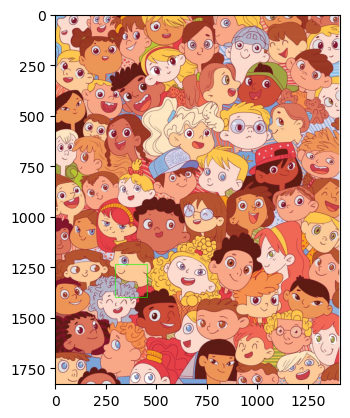

In [9]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(f"min_val: {min_val}, max_val: {max_val}")
# Draw the rectangle around the best match
top_left = min_loc
bottom_right = (top_left[0] + new_width, top_left[1] + new_height)
cv2.rectangle(cropped_rgb, top_left, bottom_right, (0, 255, 0), 2)
plt.imshow(cropped_rgb)
# min_val: 0.05337528511881828, max_val: 3.0357589721679688

### GAUSSIAN BLUR AND MEDIAN BLUR

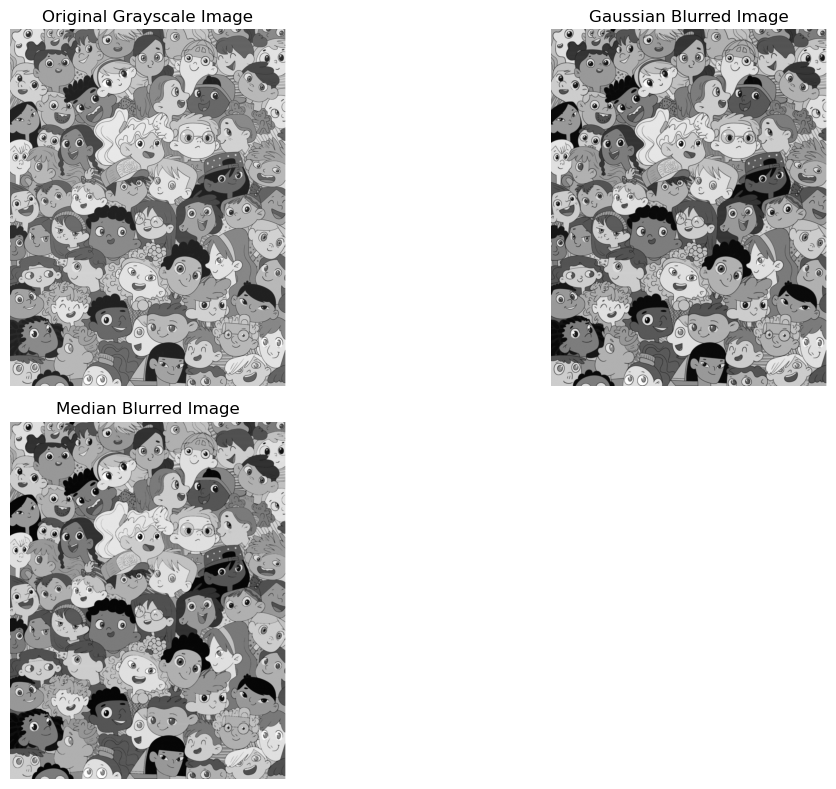

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image from the file
img = cv2.imread('CropImg/cropped_1.jpg')
if img is None:
    print("Cannot read image from the provided path!")
    exit()

# If the image is in color, convert it to grayscale (optional if you prefer to work with grayscale)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to the grayscale image
# Parameters: source image, kernel size (3*3), and sigmaX (0 lets OpenCV automatically calculate it)
gaussian_blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Apply Median Blur to the grayscale image
# Parameter: source image and kernel size (should be an odd number, here 5)
median_blurred = cv2.medianBlur(img_gray, 5)

# Display the results using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')  # Hide axis

plt.subplot(2, 2, 2)
plt.imshow(gaussian_blurred, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(median_blurred, cmap='gray')
plt.title('Median Blurred Image')
plt.axis('off')

plt.tight_layout()  # Adjust the layout for better display
plt.show()


### GAUSSIAN BLUR + CANDY OR SOBEL

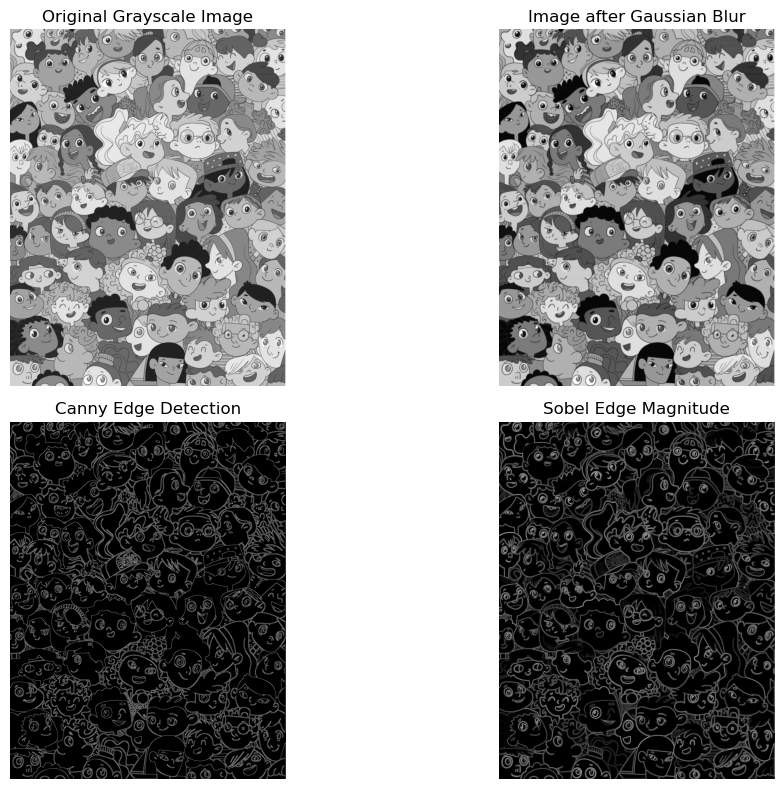

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image and convert it to grayscale
img = cv2.imread('CropImg/cropped_1.jpg')
if img is None:
    print("Cannot read the image from the provided path!")
    exit()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply smoothing to reduce noise
# Using Gaussian Blur to smooth the image, which can improve the edge detection results
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3a: Detect edges using Canny Edge Detection
# The threshold values (low: 50, high: 150) need to be chosen carefully based on the image


ret, _ = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
low_threshold = float(ret * 0.5)  
high_threshold = float(ret)       
edges_canny = cv2.Canny(gray_blur, low_threshold, high_threshold)

# low_threshold = 50
# high_threshold = 150
# edges_canny = cv2.Canny(gray_blur, low_threshold, high_threshold)

# Step 3b: Detect edges using the Sobel Operator
# Compute the gradients along the x and y directions
sobelx = cv2.Sobel(gray_blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_blur, cv2.CV_64F, 0, 1, ksize=3)
# Combine the gradients from x and y directions to obtain the edge magnitude
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
# Normalize the result to the range [0, 255] and convert to an 8-bit unsigned integer
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))

# Step 4: Display the results using matplotlib
plt.figure(figsize=(12, 8))

# Display the original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display the image after applying Gaussian Blur
plt.subplot(2, 2, 2)
plt.imshow(gray_blur, cmap='gray')
plt.title('Image after Gaussian Blur')
plt.axis('off')

# Display the edges detected by Canny Edge Detection
plt.subplot(2, 2, 3)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Display the edge magnitude computed using the Sobel operator
plt.subplot(2, 2, 4)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()
